In [1]:
!pip install tensorflow tensorflow_hub  tensorflow_text   sklearn   nlp  seaborn transformers contractions pip install tf-models-official

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 57.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.6/636.6 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289

In [2]:
import pandas as pd
import numpy as np
import sklearn
import nltk
import contractions
import string
import math
import sklearn.neighbors
import sklearn.metrics
import sklearn.linear_model
import sklearn.svm
import sklearn.naive_bayes
import os
import time

import tensorflow as tf
from official.nlp import optimization

import tensorflow_hub as hub
import tensorflow_text as text

import matplotlib.pyplot as plt

# pretrained stuff for evaluation
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import transformers
transformers.__version__
# pretrained stuff for evaluation

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

##### FUNCTIONS #####

def token(news):
    for index, rows in news.iterrows():
        rows.dropna(inplace=True) 
        #removes contractions eg. "I'd like to" -> "I would like to"
        rows = rows.apply(contractions.fix)
        #removes punctuations as well during tokenization
        tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
        tokenized_news.append(rows.apply(tokenizer.tokenize))
        #tokenized_news[index] = tokenized_news[index].apply(textToParse)
    news = pd.DataFrame(tokenized_news) 
    #news.to_csv("test.csv")
    return news

def textToParse(inputText):
    #Extract Noun(Actor) Verb(Action) Noun(Object)
    #One input text could have multiple so make it a tree and extract all of them
    # print(nlp.dependency_parse(' '.join(inputText)))
    parseText = nlp.parse(' '.join(inputText))
    
    parseTextSplit = parseText.splitlines()
    parseTextSplit = [text.lstrip() for text in parseTextSplit]
    parseText = ''.join(parseTextSplit)
    #Output would be N lists N>=0 as one dataframe

    return parseText

def textToPosTag(inputText):
    posTags = nltk.pos_tag(inputText)
    
    # for tag in posTags:
    #     print(tag[0])
    return posTags


ps = nltk.stem.PorterStemmer()
wl = nltk.stem.WordNetLemmatizer()
stop_words = nltk.corpus.stopwords.words('english')
def textCleaning(sentence):
    try:
        #transform lowercase
        sentence = [word.lower() for word in sentence]
        # #remove stopword
        # sentence = [word for word in sentence if word not in stop_words]  
        # #remove numbers
        # sentence = [word for word in sentence if not word.isdigit()] 
    except:
        sentence = " "
    return sentence


def text_clean_and_reshaping(news, dataset):
    label_volume_relate = False
    stockdata = dataset.loc[:, [label_settings, second_input_settings]]
    newsdata = []
    #headlines = []
    combined_news = []
    for index, rows in news.iterrows():
        rows = rows.apply(textCleaning)
        news.iloc[index] = rows
        label = stockdata.iat[index, 0]
        if label_volume_relate:
            if label == 0:
                volume = stockdata.iat[index, 1] * -1
            else:
                volume = stockdata.iat[index, 1]
        else:
            volume = stockdata.iat[index, 1]
        #turn the 25xN table into 1xN*25 table 
        
        for element in rows: #each element is each news title
            #combined_news.append([element, volume, label]) #element as a seperate token
            combined_news.append([' '.join(element), volume, label]) #element as a whole string
        
    news.to_csv("testFiltered.csv")   

    
    combined_news_df = pd.DataFrame(combined_news, columns=[first_input_settings, second_input_settings, label_settings])
    combined_news_df.to_csv("combined_news.csv")
    return combined_news_df

word_index = dict()
def index_based_encoding(combined_news):
    encoded_combined_news = []
    #encode each word
    
    #replace each word as encoding
    return encoded_combined_news


def to_tf_dataset_label(pd_dataframe):
    tf_dataset = tf.data.Dataset.from_tensor_slices((pd_dataframe[first_input_settings].values, pd_dataframe[label_settings].values))
    return tf_dataset

def to_tf_dataset(pd_dataframe):
    tf_dataset = tf.data.Dataset.from_tensor_slices(pd_dataframe)
    return tf_dataset

def shuffleDataframe(pd_dataframe):
    return pd_dataframe.sample(frac=1).reset_index(drop=True)

def split_data_fromDataframe_multiclass(pd_dataframe):
    pd_dataframe = shuffleDataframe(pd_dataframe)
    from sklearn.model_selection import train_test_split
    batch_size = batch_size_settings
    dataset_size = len(pd_dataframe)
    global num_classes 
    num_classes= len(pd_dataframe[label_settings].value_counts())
    global unique_secondinput
    unique_secondinput = len(pd_dataframe[second_input_settings].value_counts())
    print("numclasses " + str(num_classes))
    
    print(pd_dataframe[label_settings])
    label_categorical = tf.keras.utils.to_categorical(pd_dataframe[label_settings].values, num_classes=num_classes) #one-hot encoding
    text_train, text_temp, label_train, label_temp = train_test_split(pd_dataframe[first_input_settings], label_categorical, test_size=0.2)

    text_test, text_val = np.array_split(text_temp, 2)
    label_test, label_val = np.array_split(label_temp, 2)
    
    volume_train, volume_temp = train_test_split(pd_dataframe[second_input_settings], test_size=0.2)
    volume_test, volume_val = np.array_split(volume_temp, 2)
    
    print("text_train: " + str(len(text_train)))
    print("label_train: " +str(len(label_train)))
    print("text_test : " + str(len(text_test)))
    print("label_test : " + str(len(label_test)))
    print("text_val : " + str(len(text_val)))
    print("label_val : " + str(len(label_val)))
    
    print("label_train")
    print(label_train[:10])
    print("label_test")
    print(label_test[:10])
    print("label_val")
    print(label_val[:10])
    # text_train_tf = to_tf_dataset(text_train).batch(batch_size_settings)
    # label_train_tf = to_tf_dataset(label_train).batch(batch_size_settings)
    # text_test_tf = to_tf_dataset(text_test).batch(batch_size_settings)
    # label_test_tf = to_tf_dataset(label_test).batch(batch_size_settings)
    # text_val_tf = to_tf_dataset(text_val).batch(batch_size_settings)
    # label_val_tf = to_tf_dataset(label_val).batch(batch_size_settings)
    
    # return text_train_tf, label_train_tf, text_test_tf, label_test_tf, text_val_tf, label_val_tf
    return text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val



def build_model_OG():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)

def build_model_multi_labels():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(num_classes, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)

def build_model_multi_labels_cnn():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Reshape((-1, 1))(net)
    net = tf.keras.layers.Conv1D(32, 3, activation='relu')(net)
    net = tf.keras.layers.GlobalMaxPooling1D()(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(num_classes, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)

def build_model_multi_labels_with_hidden():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(20, activation=None, name='hidden_layer_1')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(num_classes, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)

def build_model_multi_labels_with_6_hidden():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(256, activation=None, name='hidden_layer_1')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(256, activation=None, name='hidden_layer_2')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(256, activation=None, name='hidden_layer_3')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(128, activation=None, name='hidden_layer_4')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(128, activation=None, name='hidden_layer_5')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(128, activation=None, name='hidden_layer_6')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(num_classes, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)

def build_model_multi_labels_two_inputs():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    text = outputs['pooled_output']
    number = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='number_input')
    net = tf.keras.layers.concatenate([text, number], axis=1)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(num_classes, activation=None, name='classifier')(net)
    return tf.keras.Model([text_input, number], net)

def build_model_multi_labels_two_inputs_fix():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    text = outputs['pooled_output']
    number = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='number_input')
    net = tf.keras.layers.concatenate([text, number], axis=1)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(num_classes, activation=None, name='classifier')(net)
    net = tf.keras.layers.Dense(3, activation="softmax", name='softmax_classifier')(net)
    return tf.keras.Model([text_input, number], net)

def build_model_multi_labels_two_inputs_v2():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    text = outputs['pooled_output']
    text = tf.keras.layers.Dropout(dropout_settings)(text)
    text = tf.keras.layers.Dense(3, activation=None, name='text_classifier')(text)
    
    number = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='number_input')
    number = tf.keras.layers.Dense(1, activation="softmax", name='text_classifier')(text)
    
    net = tf.keras.layers.multiply([text, number])
    net = tf.keras.layers.Dense(3, activation=None, name='classifier')(net)
    net = tf.keras.layers.Dense(3, activation="softmax", name='softmax_classifier')(net)
    return tf.keras.Model([text_input, number], net)


def build_model_multi_labels_two_inputs_with_cnn():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    text = outputs['pooled_output']
    number = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='number_input')
    net = tf.keras.layers.concatenate([text, number], axis=1)
    net = tf.keras.layers.Reshape((-1, 1))(net)
    net = tf.keras.layers.Conv1D(32, 3, activation='relu')(net)
    net = tf.keras.layers.GlobalMaxPooling1D()(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(num_classes, activation=None, name='classifier')(net)
    return tf.keras.Model([text_input, number], net)

def build_model_multi_labels_two_inputs_with_hidden_layers():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    text = outputs['pooled_output']
    number = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='number_input')
    net = tf.keras.layers.concatenate([text, number], axis=1)
    net = tf.keras.layers.Dense(128, activation='relu', name='hidden_layer')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(num_classes, activation=None, name='classifier')(net)
    return tf.keras.Model([text_input, number], net)

def build_model_multi_labels_two_inputs_with_5_extra_hidden_layers():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    text = outputs['pooled_output']
    number = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='number_input')
    net = tf.keras.layers.concatenate([text, number], axis=1)
    net = tf.keras.layers.Dense(128, activation='relu', name='hidden_layer_1')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(128, activation='relu', name='hidden_layer_2')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(128, activation='relu', name='hidden_layer_3')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(128, activation='relu', name='hidden_layer_4')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(128, activation='relu', name='hidden_layer_5')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(num_classes, activation=None, name='classifier')(net)
    return tf.keras.Model([text_input, number], net)

def build_model_multi_labels_two_inputs_with_dropout():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    text = outputs['pooled_output']
    number = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='number_input')
    net = tf.keras.layers.concatenate([text, number], axis=1)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(num_classes, activation=None, name='hidden_layer')(net)
    net = tf.keras.layers.Dropout(dropout_settings)(net)
    net = tf.keras.layers.Dense(num_classes, activation=None, name='classifier')(net)
    return tf.keras.Model([text_input, number], net)

# def loss_and_metrics():
#     return tf.keras.losses.CategoricalCrossentropy(from_logits=True), tf.metrics.CategoricalAccuracy()
#     # return tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), tf.metrics.SparseCategoricalAccuracy()
def loss_and_metrics():
    if single_input == True:
        #return tf.keras.losses.CategoricalCrossentropy(from_logits=True), tf.metrics.CategoricalAccuracy()
        return tf.keras.losses.BinaryCrossentropy(from_logits=True), tf.metrics.BinaryAccuracy()
    else:
        return tf.keras.losses.CategoricalCrossentropy(from_logits=True), tf.metrics.CategoricalAccuracy()
    
def callback_monitor():
    if single_input == True:
        #return "categorical_accuracy", "val_categorical_accuracy"
        return "binary_accuracy", "val_binary_accuracy"
    else:
        return "categorical_accuracy", "val_categorical_accuracy"
def inputs(text_train, text_test, text_val, volume_train, volume_test, volume_val):
    if multi_labeled == False:
        train_input = text_train
        test_input = text_test
        val_input = text_val
        return train_input, test_input, val_input 
    else:
        train_input = [text_train, volume_train]
        test_input = [text_test, volume_test]
        val_input = [text_val, volume_val]
        return train_input, test_input, val_input 
    
def train_model(modelfunc, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val):
    strategy = tf.distribute.MirroredStrategy()
    with strategy.scope():
        loss, metrics = loss_and_metrics()
        train_input, test_input, val_input = inputs(text_train, text_test, text_val, volume_train, volume_test, volume_val)
        # loss = "categorical_crossentropy"
        # metrics = tf.keras.metrics.CategoricalAccuracy(name="accuracy")
        #epochs
        epochs = epochs_settings
        steps_per_epoch = math.ceil(len(text_train) / batch_size_settings) #tf.data.experimental.cardinality(text_train).numpy() #would be the number of batches in total
        num_train_steps = steps_per_epoch * epochs
        num_warmup_steps = int(0.1*num_train_steps)

        #learning rate default 3e-5
        init_lr = 3e-5
        init_lr = 1e-5

        #set optimizer
        optimizer = optimization.create_optimizer(init_lr=init_lr,
                                                  num_train_steps=num_train_steps,
                                                  num_warmup_steps=num_warmup_steps,
                                                  optimizer_type='adamw')
    
    
        model = modelfunc()
    
        #compile model
        model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics)
    
    
    #set model checkpoint
    model_checkpoint_path = "/temp/checkpoint"
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_checkpoint_path,
                                                                   save_weights_only=True,
                                                                   monitor='val_accuracy',
                                                                   mode='max',
                                                                   save_best_only=True)
    
    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = callback_monitor()[0], 
                                                          patience = 15,
                                                          mode="auto",
                                                          restore_best_weights = True,
                                                          verbose=1,
                                                          min_delta=0.025)
    batch_size_set = batch_size_settings * strategy.num_replicas_in_sync
    #train model
    history = model.fit(x=train_input,
                        y=label_train,
                        batch_size = batch_size_set,
                        shuffle = True,
                        validation_data=(val_input, label_val),
                        epochs=epochs,
                        callbacks=[earlystop_callback])
            
            
    #save model
    model_folder = model_folder_settings
    encoder_name = tfhub_handle_encoder.split("/")[len(tfhub_handle_encoder.split("/"))-2]
    preprocess_name = tfhub_handle_preprocess.split("/")[len(tfhub_handle_preprocess.split("/"))-2]
    model_name = file_name + "_" + encoder_name + "_" + preprocess_name
    model_path = model_folder + "/" + num_of_inputs + "/" + model_version + "/"
    
    print(model_path)
    model.save(model_path + model_name + ".h5", include_optimizer=False)
    
    from tensorflow.python.ops.math_ops import truncate_div_eager_fallback
    tf.keras.utils.plot_model(model, show_layer_names=True, show_layer_activations=truncate_div_eager_fallback, to_file=(model_path + "model.png"), dpi=600)
    #model evaluation
    loss, accuracy = model.evaluate(test_input, label_test)

    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')
    
    #save test data to file
    pd.DataFrame(label_test).to_csv(model_path + "label_test.csv")
    pd.DataFrame(test_input).to_csv(model_path + "test_input.csv")
    pd.DataFrame(text_test).to_csv(model_path + "text_test.csv")
    
    # predictions = model.predict(test_input)
    # confusion_matrix = tf.math.confusion_matrix(label_test, predictions)
    # print("Confusion Matrix")
    # print(np.unique(label_test, axis=0))
    # print(confusion_matrix)
    
    if label_settings != "Label":
        pretrained_label_test = pretrained(text_test)
        
        loss, accuracy = model.evaluate(test_input, pretrained_label_test)
        print("Compare to pretrain model results")
        print(f'Loss: {loss}')
        print(f'Accuracy: {accuracy}')
   
    
    print(model.predict(test_input))
    
    #reloaded_model = tf.saved_model.load(model_path)
    #reloaded_model = tf.keras.models.load_model(model_path)
    
    history_dict = history.history

    acc = history_dict[callback_monitor()[0]]
    val_acc = history_dict[callback_monitor()[1]]
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1, len(acc) + 1)
    fig = plt.figure(figsize=(10, 6))
    fig.tight_layout()

    plt.subplot(2, 1, 1)
    # r is for "solid red line"
    plt.plot(epochs, loss, 'r', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    # plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    plt.savefig(model_path + "training_history.png")
    #plt.show()
    return model
    
# pretrained stuff for evaluation
def pretrained(dataset):
    pretrained_model_name = "Jean-Baptiste/roberta-large-financial-news-sentiment-en"
    from transformers import AutoTokenizer, AutoModelForSequenceClassification
    tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name)
    model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name)
    
    pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)
    
    #dataset_array = tf_dataset_to_array(dataset)
    # dataset_array = dataset
    
    # new_dataset = []
    
    # for i in range(0, len(dataset_array), 2):
    #     new_dataset.append(dataset_array[i])
    
    print(f"Fitting pretrain model ({pretrained_model_name})...")
    results = pipe(dataset.tolist())
    
    transformed_results = []
    for i in range(len(results)):
        if results[i]['label'] == "neutral":
            transformed_results.append(0)
        elif results[i]['label'] == "positive":
            transformed_results.append(1)
        else:
            transformed_results.append(2)
    
    
    
    return tf.keras.utils.to_categorical(transformed_results, num_classes=num_classes)

def finbert(dataset):
    finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
    tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
    
    nlp = pipeline("text-classification", model=finbert, tokenizer=tokenizer)
    
    dataset_array = tf_dataset_to_array(dataset)
    
    new_dataset = []
    
    for i in range(0, len(dataset_array), 2):
        new_dataset.append(dataset_array[i])
        
    results = nlp(new_dataset)
    
    
    return results

def tf_dataset_to_array(dataset):
    dataset = dataset.unbatch()
    dataset_array = np.concatenate([batch for batch in dataset.as_numpy_iterator()])
    dataset_array = [x.decode('UTF-8') for x in dataset_array]
    return dataset_array
# pretrained stuff for evaluation  
    


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:

####settings####
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/2'   
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
file_name = "/kaggle/input/processed-dataset/Processed_Dataset.csv"
model_folder_settings = "./missingmodels/"
batch_size_settings = 32
epochs_settings = 45
dropout_settings = 0.5
single_input = False
multi_labeled = True
first_input_settings = 'News'
second_input_settings = 'Vol_change'#'Volume'
label_settings = 'Label'
####settings#### 

##initialize##   
num_classes = 0
model_version = ""
num_of_inputs = ""
unique_secondinput = 0
##### MAIN #####
## Notes
print("NOTES: normal labeling was wrong because the wrong loss and metrics were used and this should be hopefully correct, this include an additional cnn model as well")

## Read Dataset 
dataset = pd.read_csv(file_name)
dataset.drop(columns=dataset.columns[0], axis=1, inplace=True)
news = dataset.iloc[:,1:26]
tokenized_news = []
## Part 1: Embedding
#tokenization
print("Tokenization...")
news = token(news)
#preprocessing
print("Text cleaning and dataframe reshape...")
comb_news = text_clean_and_reshaping(news, dataset)
#load dataset


NOTES: normal labeling was wrong because the wrong loss and metrics were used and this should be hopefully correct, this include an additional cnn model as well
Tokenization...
Text cleaning and dataframe reshape...


Split dataset...
numclasses 2
0        1
1        0
2        0
3        0
4        1
        ..
49695    0
49696    0
49697    1
49698    0
49699    1
Name: Label, Length: 49700, dtype: int64
text_train: 39760
label_train: 39760
text_test : 4970
label_test : 4970
text_val : 4970
label_val : 4970
label_train
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
label_test
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
label_val
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
numclasses 2
0        0
1        0
2        1
3        1
4        1
        ..
49695    0
49696    1
49697    0
49698    1
49699    0
Name: Label, Length: 49700, dtype: int64
text_train: 39760
label_train: 39760
text_test : 4970
label_test : 4970
text_val : 4970
label_val : 4970
label_train
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
label_test
[[0

Fitting pretrain model (Jean-Baptiste/roberta-large-financial-news-sentiment-en)...
156/156 [==============================] - 13s 80ms/step - loss: 9005781.0000 - categorical_accuracy: 0.2004
Compare to pretrain model results
Loss: 9005781.0
Accuracy: 0.2004024088382721
156/156 [==============================] - 14s 79ms/step
[[   200143.16     194849.92    1488475.2  ]
 [  4999741.      4867459.     37183124.   ]
 [  -109636.34    -106734.516   -815360.56 ]
 ...
 [ -1973088.4    -1920882.2   -14673866.   ]
 [  3212640.5     3127641.     23892438.   ]
 [  -450335.5     -438418.6    -3349141.8  ]]
--- 4559.203494310379 seconds ---
Build Model two_inputs/Vol_change cnn_ver...
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None,)]            0           []                               
  

ValueError: The first argument to `Layer.call` must always be passed.

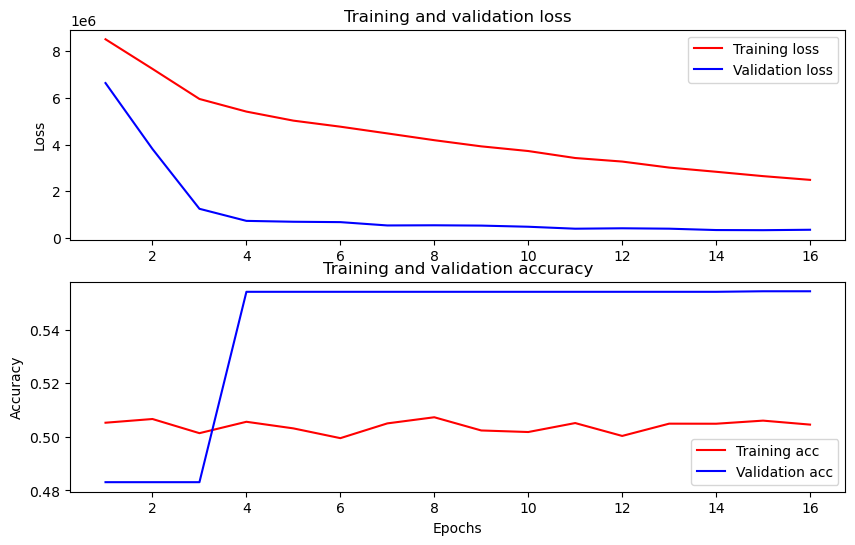

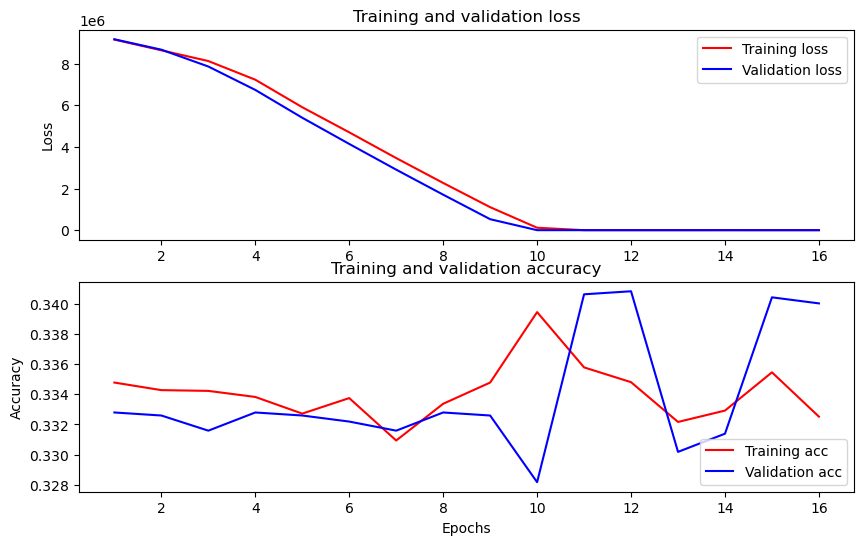

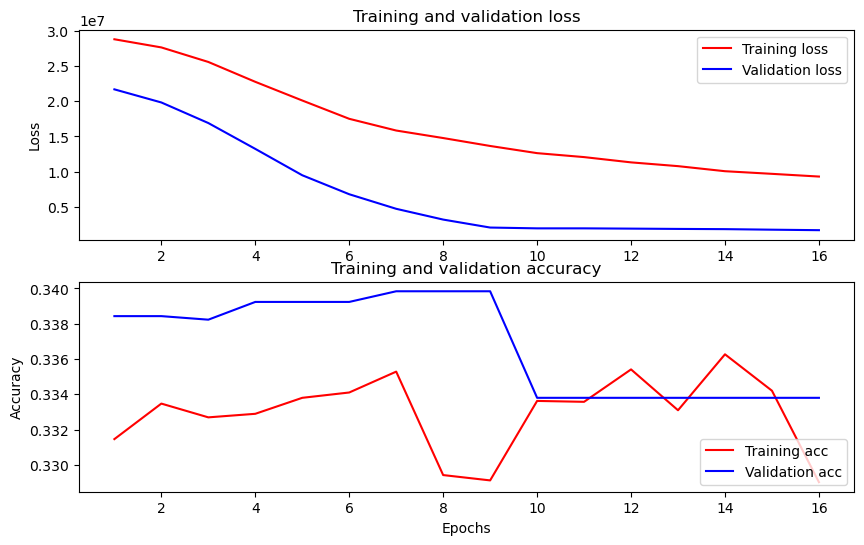

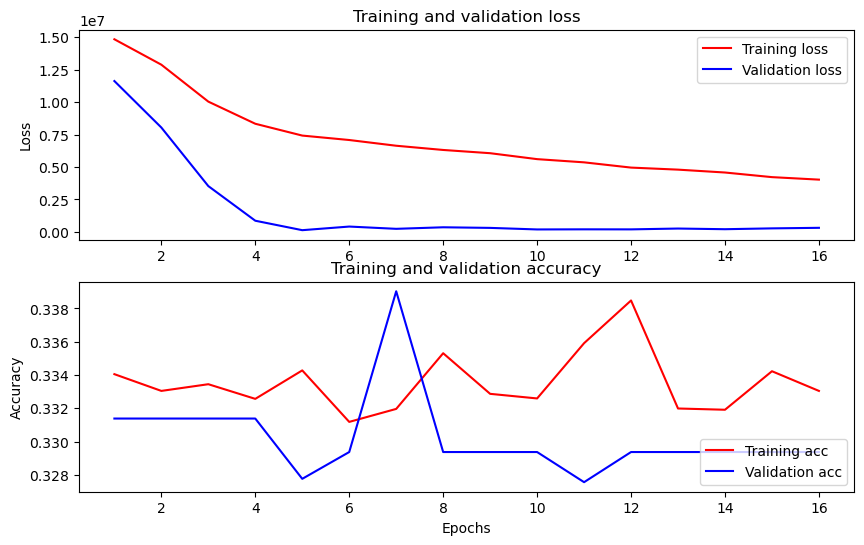

In [4]:

######### overnight settings main #########
print("Split dataset...")
label_settings = 'Label' #or 'Label_I' or 'Label_II'
comb_news = text_clean_and_reshaping(news, dataset)
text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val = split_data_fromDataframe_multiclass(comb_news)
## single input
# num_of_inputs = "one_input/Label"
# single_input = False
# #normal
# model_version = "normal_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))
# #hidden
# model_version = "hidden_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_with_hidden()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))
# #cnn
# model_version = "cnn_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_cnn()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))
# ## single input
# label_settings = 'Label_I' #or 'Label_I' or 'Label_II'
# comb_news = text_clean_and_reshaping(news, dataset)
# text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val = split_data_fromDataframe_multiclass(comb_news)
# num_of_inputs = "one_input/Label_I"
# single_input = False
# #hidden
# model_version = "hidden_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_with_hidden()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))
# #cnn
# model_version = "cnn_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_cnn()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))



## double inputs
label_settings = 'Label' #or 'Label_I' or 'Label_II'
second_input_settings = "Vol_change"
comb_news = text_clean_and_reshaping(news, dataset)
text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val = split_data_fromDataframe_multiclass(comb_news)
multi_labeled = True
num_of_inputs = "two_inputs/Vol_change"
single_input = False
# #normal
# model_version = "normal_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_two_inputs()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))
# #cnn
# model_version = "cnn_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_two_inputs_with_cnn()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))
#hidden
model_version = "hidden_ver"
print(f"Build Model {num_of_inputs} {model_version}...")
model = build_model_multi_labels_two_inputs_with_hidden_layers()
print(model.summary())
print(f"Train Model {num_of_inputs} {model_version}...")
start_time = time.time()
train_model(build_model_multi_labels_two_inputs_with_hidden_layers, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
print("--- %s seconds ---" % (time.time() - start_time))

## double inputs
label_settings = 'Label_I' #or 'Label_I' or 'Label_II'
second_input_settings = "Vol_change"
comb_news = text_clean_and_reshaping(news, dataset)
text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val = split_data_fromDataframe_multiclass(comb_news)

num_of_inputs = "two_inputs/Vol_change"
single_input = False
#normal
model_version = "normal_ver"
print(f"Build Model {num_of_inputs} {model_version}...")
model = build_model_multi_labels_two_inputs()
print(model.summary())
print(f"Train Model {num_of_inputs} {model_version}...")
start_time = time.time()
train_model(build_model_multi_labels_two_inputs, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
print("--- %s seconds ---" % (time.time() - start_time))
#cnn
model_version = "cnn_ver"
print(f"Build Model {num_of_inputs} {model_version}...")
model = build_model_multi_labels_two_inputs_with_cnn()
print(model.summary())
print(f"Train Model {num_of_inputs} {model_version}...")
start_time = time.time()
train_model(build_model_multi_labels_two_inputs_with_cnn, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
print("--- %s seconds ---" % (time.time() - start_time))
#hidden
model_version = "hidden_ver"
print(f"Build Model {num_of_inputs} {model_version}...")
model = build_model_multi_labels_two_inputs_with_hidden_layers()
print(model.summary())
print(f"Train Model {num_of_inputs} {model_version}...")
start_time = time.time()
train_model(build_model_multi_labels_two_inputs_with_hidden_layers, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
print("--- %s seconds ---" % (time.time() - start_time))


## double inputs
label_settings = 'Label' #or 'Label_I' or 'Label_II'
second_input_settings = "Volume"
comb_news = text_clean_and_reshaping(news, dataset)
text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val = split_data_fromDataframe_multiclass(comb_news)

num_of_inputs = "two_inputs/Volume"
single_input = False
#normal
model_version = "normal_ver"
print(f"Build Model {num_of_inputs} {model_version}...")
model = build_model_multi_labels_two_inputs()
print(model.summary())
print(f"Train Model {num_of_inputs} {model_version}...")
start_time = time.time()
train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
print("--- %s seconds ---" % (time.time() - start_time))
#cnn
model_version = "cnn_ver"
print(f"Build Model {num_of_inputs} {model_version}...")
model = build_model_multi_labels_two_inputs_with_cnn()
print(model.summary())
print(f"Train Model {num_of_inputs} {model_version}...")
start_time = time.time()
train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
print("--- %s seconds ---" % (time.time() - start_time))
#hidden
model_version = "hidden_ver"
print(f"Build Model {num_of_inputs} {model_version}...")
model = build_model_multi_labels_two_inputs_with_hidden_layers()
print(model.summary())
print(f"Train Model {num_of_inputs} {model_version}...")
start_time = time.time()
train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
print("--- %s seconds ---" % (time.time() - start_time))

## double inputs
label_settings = 'Label_I' #or 'Label_I' or 'Label_II'
second_input_settings = "Volume"
comb_news = text_clean_and_reshaping(news, dataset)
text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val = split_data_fromDataframe_multiclass(comb_news)

num_of_inputs = "two_inputs/Volume"
single_input = False
#normal
model_version = "normal_ver"
print(f"Build Model {num_of_inputs} {model_version}...")
model = build_model_multi_labels_two_inputs()
print(model.summary())
print(f"Train Model {num_of_inputs} {model_version}...")
start_time = time.time()
train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
print("--- %s seconds ---" % (time.time() - start_time))
#cnn
model_version = "cnn_ver"
print(f"Build Model {num_of_inputs} {model_version}...")
model = build_model_multi_labels_two_inputs_with_cnn()
print(model.summary())
print(f"Train Model {num_of_inputs} {model_version}...")
start_time = time.time()
train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
print("--- %s seconds ---" % (time.time() - start_time))
#hidden
model_version = "hidden_ver"
print(f"Build Model {num_of_inputs} {model_version}...")
model = build_model_multi_labels_two_inputs_with_hidden_layers()
print(model.summary())
print(f"Train Model {num_of_inputs} {model_version}...")
start_time = time.time()
train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
print("--- %s seconds ---" % (time.time() - start_time))

# ## double inputs
# label_settings = 'Label' #or 'Label_I' or 'Label_II'
# second_input_settings = "Vol_change"
# comb_news = text_clean_and_reshaping(news, dataset)
# text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val = split_data_fromDataframe_multiclass(comb_news)
# multi_labeled = True
# num_of_inputs = "two_inputs/Vol_change"
# single_input = False
# # #normal
# # model_version = "normal_ver"
# # print(f"Build Model {num_of_inputs} {model_version}...")
# # model = build_model_multi_labels_two_inputs()
# # print(model.summary())
# # print(f"Train Model {num_of_inputs} {model_version}...")
# # start_time = time.time()
# # train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# # print("--- %s seconds ---" % (time.time() - start_time))
# # #cnn
# # model_version = "cnn_ver"
# # print(f"Build Model {num_of_inputs} {model_version}...")
# # model = build_model_multi_labels_two_inputs_with_cnn()
# # print(model.summary())
# # print(f"Train Model {num_of_inputs} {model_version}...")
# # start_time = time.time()
# # train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# # print("--- %s seconds ---" % (time.time() - start_time))
# #hidden
# model_version = "hidden_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_two_inputs_with_hidden_layers()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))

# ## double inputs
# label_settings = 'Label_I' #or 'Label_I' or 'Label_II'
# second_input_settings = "Vol_change"
# comb_news = text_clean_and_reshaping(news, dataset)
# text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val = split_data_fromDataframe_multiclass(comb_news)

# num_of_inputs = "two_inputs/Vol_change"
# single_input = False
# #normal
# model_version = "normal_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_two_inputs()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))
# #cnn
# model_version = "cnn_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_two_inputs_with_cnn()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))
# #hidden
# model_version = "hidden_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_two_inputs_with_hidden_layers()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))


# ## double inputs
# label_settings = 'Label' #or 'Label_I' or 'Label_II'
# second_input_settings = "Volume"
# comb_news = text_clean_and_reshaping(news, dataset)
# text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val = split_data_fromDataframe_multiclass(comb_news)

# num_of_inputs = "two_inputs/Volume"
# single_input = False
# #normal
# model_version = "normal_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_two_inputs()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))
# #cnn
# model_version = "cnn_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_two_inputs_with_cnn()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))
# #hidden
# model_version = "hidden_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_two_inputs_with_hidden_layers()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))

# ## double inputs
# label_settings = 'Label_I' #or 'Label_I' or 'Label_II'
# second_input_settings = "Volume"
# comb_news = text_clean_and_reshaping(news, dataset)
# text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val = split_data_fromDataframe_multiclass(comb_news)

# num_of_inputs = "two_inputs/Volume"
# single_input = False
# #normal
# model_version = "normal_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_two_inputs()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))
# #cnn
# model_version = "cnn_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_two_inputs_with_cnn()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))
# #hidden
# model_version = "hidden_ver"
# print(f"Build Model {num_of_inputs} {model_version}...")
# model = build_model_multi_labels_two_inputs_with_hidden_layers()
# print(model.summary())
# print(f"Train Model {num_of_inputs} {model_version}...")
# start_time = time.time()
# train_model(model, text_train, label_train, text_test, label_test, text_val, label_val, volume_train, volume_test, volume_val)
# print("--- %s seconds ---" % (time.time() - start_time))

In [1]:
!tar -zcvf outputname.tar.gz /kaggle/working

tar: Removing leading `/' from member names
/kaggle/working/
/kaggle/working/state.db
/kaggle/working/outputname.tar.gz
tar: /kaggle/working/outputname.tar.gz: file changed as we read it
/kaggle/working/__notebook_source__.ipynb
/kaggle/working/combined_news.csv
/kaggle/working/.virtual_documents/
/kaggle/working/testFiltered.csv
/kaggle/working/missingmodels/
/kaggle/working/missingmodels/two_inputs/
/kaggle/working/missingmodels/two_inputs/Vol_change/
/kaggle/working/missingmodels/two_inputs/Vol_change/cnn_ver/
/kaggle/working/missingmodels/two_inputs/Vol_change/cnn_ver/kaggle/
/kaggle/working/missingmodels/two_inputs/Vol_change/cnn_ver/kaggle/input/
/kaggle/working/missingmodels/two_inputs/Vol_change/cnn_ver/kaggle/input/processed-dataset/
/kaggle/working/missingmodels/two_inputs/Vol_change/cnn_ver/kaggle/input/processed-dataset/Processed_Dataset.csv_bert_en_uncased_L-4_H-256_A-4_bert_en_uncased_preprocess.h5
/kaggle/working/missingmodels/two_inputs/Vol_change/cnn_ver/label_test.csv